<a href="https://colab.research.google.com/github/emmab-collab/Machine-Learning/blob/main/Student_Mental_Health/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()


Kaggle credentials set.
Kaggle credentials successfully validated.


In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

playground_series_s4e11_path = kagglehub.competition_download('playground-series-s4e11')

print('Data source import complete.')


100%|██████████| 4.55M/4.55M [00:00<00:00, 4.88MB/s]

Extracting files...


Data source import complete.


# 1. Définir un objectif mesurable
## Objectif

Prédire si une personne est en dépression en fonction des données cliniques disponibles

## Métrique

- accuracy(précision) TP/(TP+FP) -> on veut pas de faux positifs, on veut pas envoyer à l'hôpital pour rien
- recall(sensibilité) TP/(TP+FN) -> on veut pas de faux négatifs, on veut surtout pas louper un positif
- F1score

Problème : classes déséquilibrées, on a déjà 82% des exemples qui ne sont pas en dépression donc on peut atteindre 0.82 accuracy
**Donc on ne choisit pas l'accuracy**

**Métrique** : F1 0.5 et Recall 0.7

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [ ]:
import os
link=os.path.join(playground_series_s4e11_path, 'train.csv')
#data=pd.read_excel(link)
data=pd.read_csv(link)
df=data.copy()
df.head()

id      Name  Gender   Age           City Working Professional or Student  \
0   0  Aaradhya  Female  49.0       Ludhiana            Working Professional   
1   1     Vivan    Male  26.0       Varanasi            Working Professional   
2   2    Yuvraj    Male  33.0  Visakhapatnam                         Student   
3   3    Yuvraj    Male  22.0         Mumbai            Working Professional   
4   4      Rhea  Female  30.0         Kanpur            Working Professional   

         Profession  Academic Pressure  Work Pressure  CGPA  \
0              Chef                NaN            5.0   NaN   
1           Teacher                NaN            4.0   NaN   
2               NaN                5.0            NaN  8.97   
3           Teacher                NaN            5.0   NaN   
4  Business Analyst                NaN            1.0   NaN   

   Study Satisfaction  Job Satisfaction     Sleep Duration Dietary Habits  \
0                 NaN               2.0  More than 8 hours        Healthy   
1                 NaN               3.0  Less than 5 hours      Unhealthy   
2                 2.0               NaN          5-6 hours        Healthy   
3                 NaN               1.0  Less than 5 hours       Moderate   
4                 NaN               1.0          5-6 hours      Unhealthy   

    Degree Have you ever had suicidal thoughts ?  Work/Study Hours  \
0      BHM                                    No               1.0   
1      LLB                                   Yes               7.0   
2  B.Pharm                                   Yes               3.0   
3      BBA                                   Yes              10.0   
4      BBA                                   Yes               9.0   

   Financial Stress Family History of Mental Illness  Depression  
0               2.0                               No           0  
1               3.0                               No           1  
2               1.0                               No           1  
3               1.0                              Yes           1  
4               4.0                              Yes           0

# 2. EDA (Exploratory Data Analysis)
**Objectif** : Comprendre au mieux les données pour définir une stratégie de modélisation.

* **Analyse de la forme :**
  * **Identification de la target** : Depression
  * **Nombre de lignes et colonnes** : 140700, 20
  * **Type de variables** : qualitatives : 10, quantitatives : 10
  * **Identification des valeurs manquantes** :
    * 3 variables ont beaucoup de NaN (>80%)
    * 2 groupes de données : 80% -> studies (Academic Pressure, CGPA,Study Satisfaction), 20% -> job (Profession, Work Pressure, Job Satisfaction)
    
* **Analyse du fond :**
  * **Visualisation de la target** :
    * 18% de cas de Dépression, 82% de cas sains
  * **Compréhension des différentes variables**
    * Variables continues : beaucoup de catégories chiffrées
    * Variables qualitatives : énormément de catégories (nom, métiers, études), globalement que des villes indiennes, bcp de profs intérrogés et moins d'étudiants (1/5) que de travailleurs (4/5)
    * Age : de 20 à 60 ans
  * **Visualisation des relations features-target**:
    * job/ target :
      - plus grande work pressure et faible job estimation chez les deprimés
      - heures de travail/study semble plus élevée chez les Déprimés
    * studies / target :
      - il semblerait que les étudiants sont bcp plus déprimés que les travailleurs
      - beaucoup de 'class 12' dans les déprimés (aucune info supplémentaire)
      - academic pressure plus grande pour les étudiants déprimés
    * age / target :
      - les 20-30 ans semblent beaucoup plus déprimés
    * hygiène de vie / Target :
      - il semblerait que la duréé de sommeil et le régime alimentaire joue un rôle dans la dépression --> hypothèse à tester
      - financiel stress plus élevé chez les déprimés
    * variables object :
      - il semblerait y avoir un fort lien entre les idées suicidaires et la dépression
  * **Identification des outliers**

### **Analyse de la forme**
## **Identification de la target**

In [ ]:
target_feature='Depression'

In [ ]:
df.shape

(140700, 20)

## **Type de variables**

In [ ]:
df.dtypes.value_counts()

object     10
float64     8
int64       2
Name: count, dtype: int64

In [ ]:
df.dtypes

id                                         int64
Name                                      object
Gender                                    object
Age                                      float64
City                                      object
Working Professional or Student           object
Profession                                object
Academic Pressure                        float64
Work Pressure                            float64
CGPA                                     float64
Study Satisfaction                       float64
Job Satisfaction                         float64
Sleep Duration                            object
Dietary Habits                            object
Degree                                    object
Have you ever had suicidal thoughts ?     object
Work/Study Hours                         float64
Financial Stress                         float64
Family History of Mental Illness          object
Depression                                 int64
dtype: object

## **Analyse des Valeurs manquantes**

<Axes: >

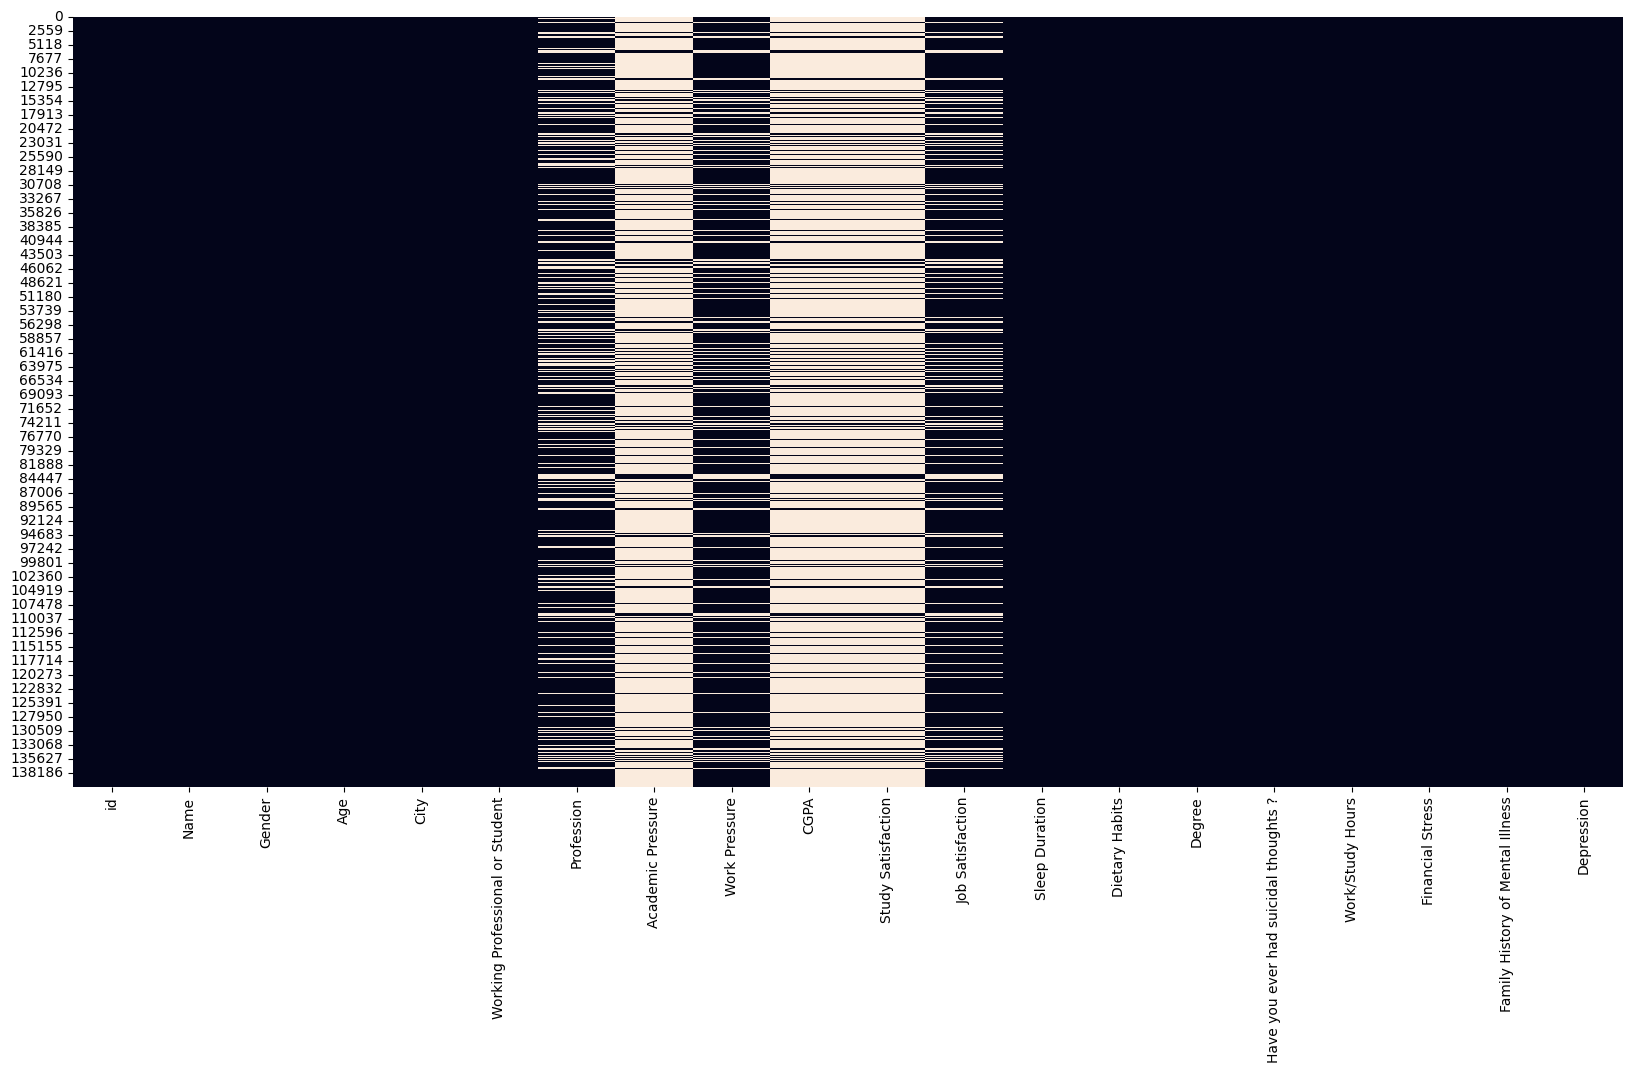

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(),cbar=False)
#Valeurs manquantes en blanc

In [ ]:
print('Colonnes et pourcentage de valeurs manquantes :\n')
(df.isna().sum()/df.shape[0]).sort_values(ascending=False)

Colonnes et pourcentage de valeurs manquantes :



Study Satisfaction                       0.801727
Academic Pressure                        0.801727
CGPA                                     0.801720
Profession                               0.260341
Work Pressure                            0.198422
Job Satisfaction                         0.198365
Financial Stress                         0.000028
Dietary Habits                           0.000028
Degree                                   0.000014
Gender                                   0.000000
Name                                     0.000000
id                                       0.000000
Age                                      0.000000
City                                     0.000000
Working Professional or Student          0.000000
Sleep Duration                           0.000000
Have you ever had suicidal thoughts ?    0.000000
Work/Study Hours                         0.000000
Family History of Mental Illness         0.000000
Depression                               0.000000
dtype: float64

### **Analyse du Fond**

## **Elimination des colonnes inutiles**

In [ ]:
df.drop('id',axis=1,inplace=True)

## **Visualisation de la target**

In [ ]:
print(f'Répartition de {target_feature} :\n')
df[target_feature].value_counts(normalize=True)

Répartition de Depression :



Depression
0    0.818287
1    0.181713
Name: proportion, dtype: float64

## **Histogrammes des variables continues**

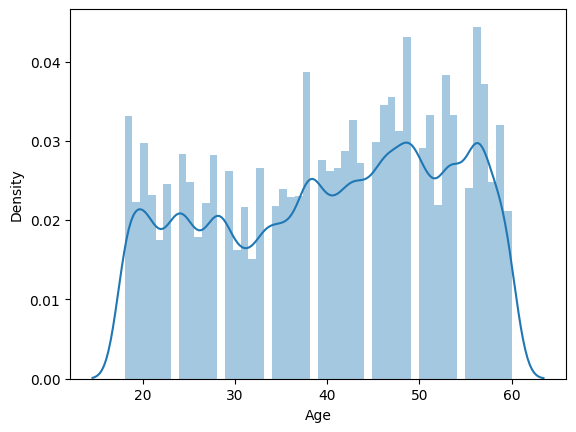

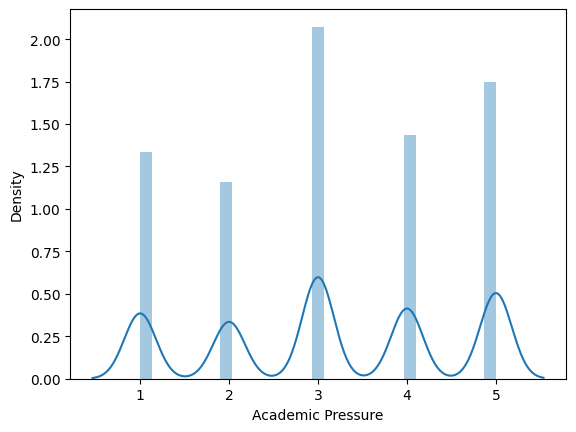

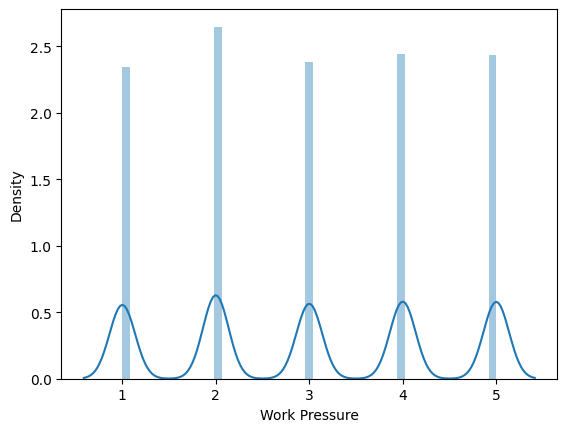

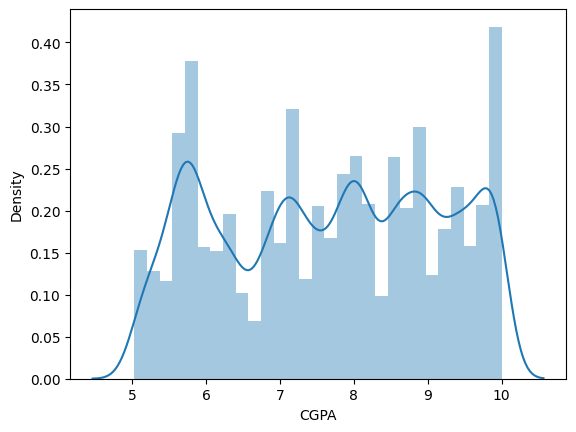

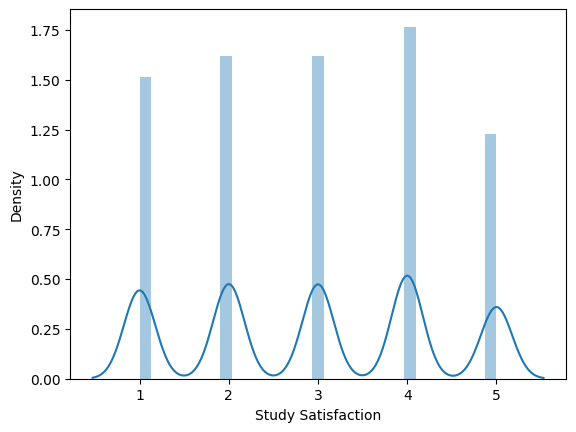

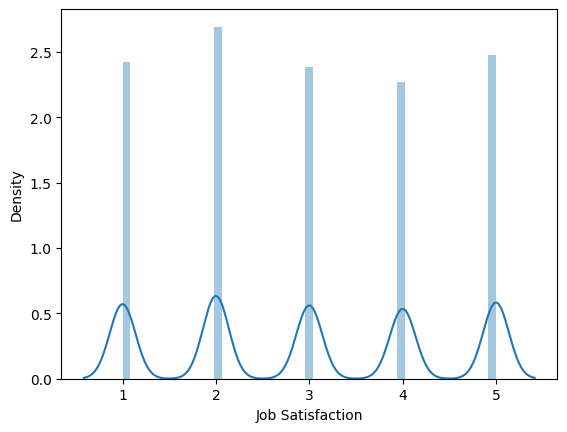

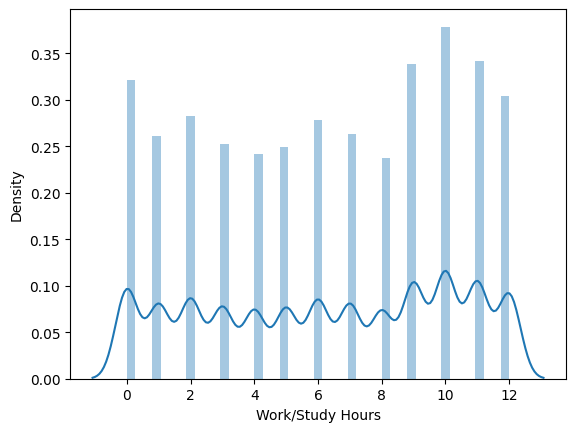

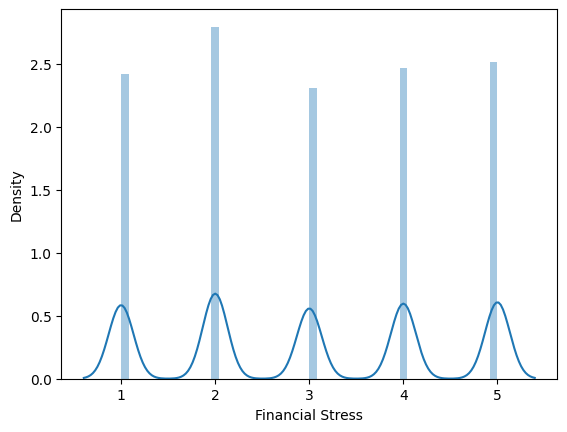

In [ ]:
for col in df.select_dtypes('float'):
    plt.figure()
    sns.distplot(df[col])

#pas une bonne idée

## **Variables Qualitatives**

In [ ]:
for col in df.select_dtypes('object'):
    print(f'{col :-<50}{df[col].unique()}')

Name----------------------------------------------['Aaradhya' 'Vivan' 'Yuvraj' 'Rhea' 'Vani' 'Ritvik' 'Rajveer' 'Aishwarya'
 'Simran' 'Utkarsh' 'Aahana' 'Tejas' 'Aadhya' 'Kiran' 'Aditi' 'Suhani'
 'Jiya' 'Bhavesh' 'Armaan' 'Ishaani' 'Prachi' 'Pratyush' 'Abhinav'
 'Siddhesh' 'Aditya' 'Aarav' 'Asha' 'Kashish' 'Prisha' 'Chhavi' 'Tanmay'
 'Vihaan' 'Shiv' 'Anvi' 'Darsh' 'Samar' 'Raunak' 'Mahi' 'Shaurya' 'Vidya'
 'Jai' 'Ayush' 'Ansh' 'Anand' 'Yashvi' 'Shrey' 'Ritika' 'Mihir' 'Isha'
 'Arjun' 'Rohan' 'Pratham' 'Nirvaan' 'Ishaan' 'Aarya' 'Riya' 'Aariv'
 'Raghavendra' 'Mahika' 'Abhishek' 'Harshil' 'Janvi' 'Kartikeya' 'Shivam'
 'Advait' 'Reyansh' 'Saanvi' 'Ivaan' 'Pallavi' 'Sneha' 'Ayaan' 'Aakash'
 'Raghav' 'Satyam' 'Aarush' 'Vibha' 'Rupal' 'Sanya' 'Mira' 'Rashi' 'Shlok'
 'Harsha' 'Divya' 'Pranav' 'Hrithik' 'Tushar' 'Garima' 'Zoya' 'Kian'
 'Navya' 'Lakshay' 'Kriti' 'Palak' 'Aryan' 'Parth' 'Ishan' 'Rupak'
 'Atharv' 'Aarti' 'Anirudh' 'Kabir' 'Sanjeev' 'Sanket' 'Tara' 'Gagan'
 'Anjali' 'Gaurav' 'Vikr

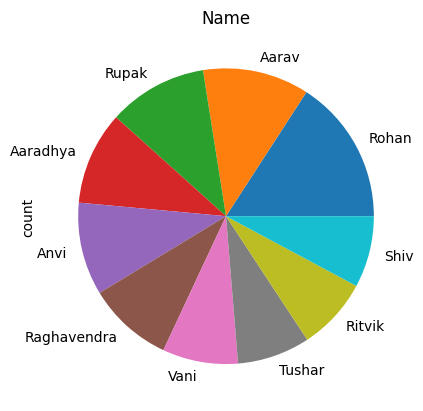

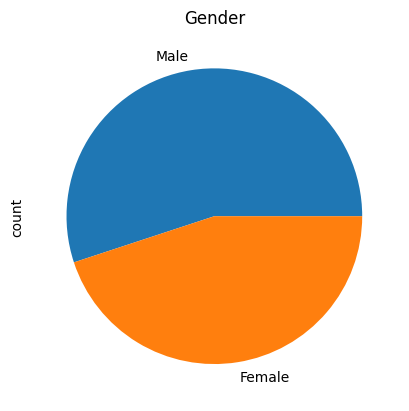

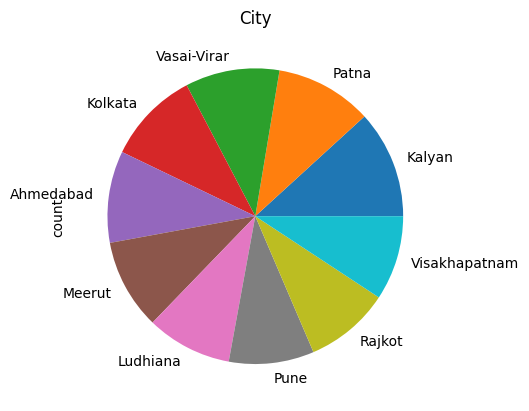

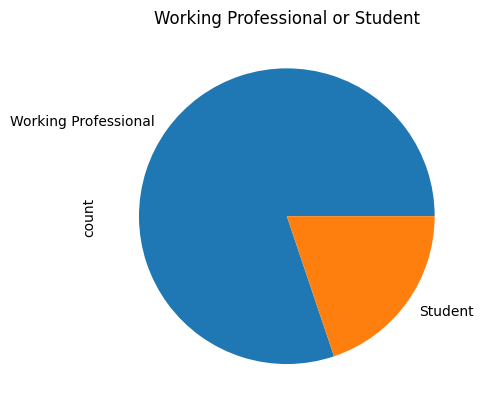

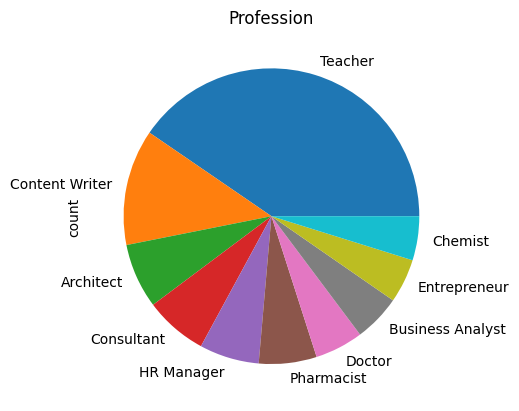

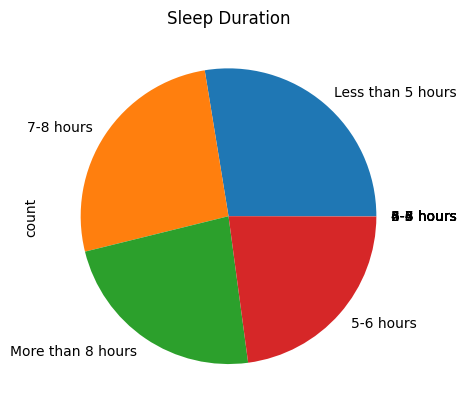

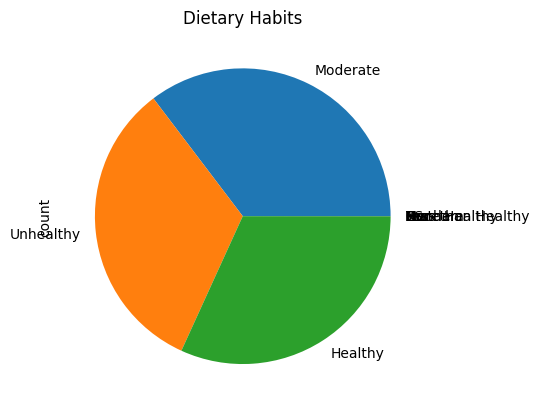

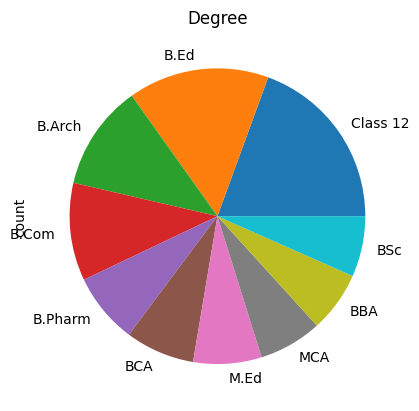

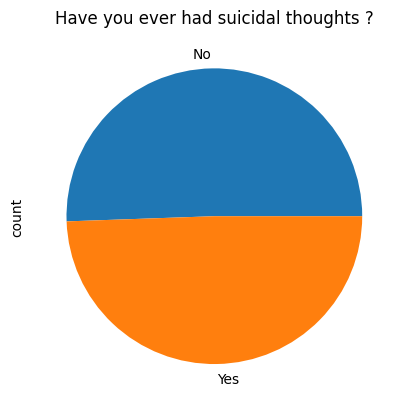

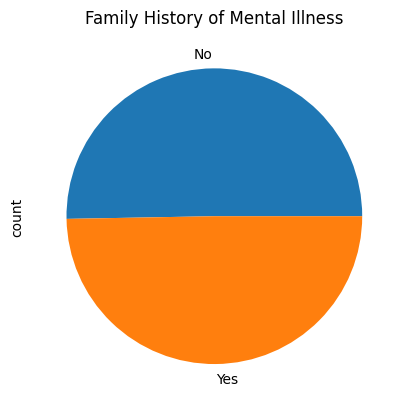

In [ ]:
for col in df.select_dtypes('object'):
    plt.figure()
    df[col].value_counts().sort_values(ascending=False)[:10].plot.pie()
    plt.title(col)

## **Relation Variables / Target**
### **Création de sous-ensembles positif et négatif**

In [ ]:
positive_df=df[df[target_feature]==1]
negative_df=df[df[target_feature]==0]

### **Création des ensembles job et study**

In [ ]:
#'Profession',
job_columns=['Work Pressure', 'Job Satisfaction']
studies_columns=['Academic Pressure', 'CGPA','Study Satisfaction']

### **Target / job**

Text(0.5, 1.0, 'Profession')

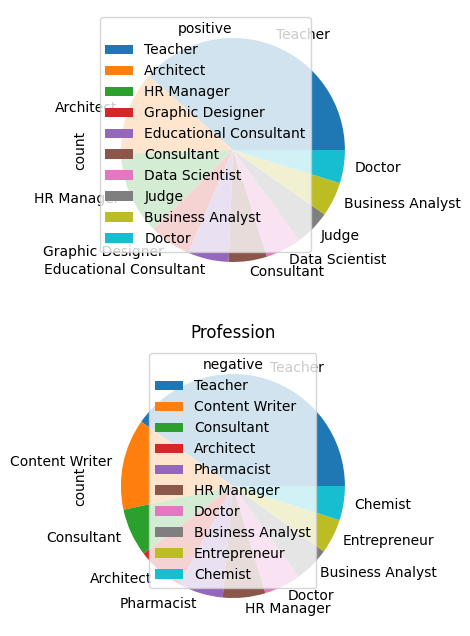

In [ ]:
plt.figure(figsize=(12,8))
plt.subplot(2,1,1)
positive_df['Profession'].value_counts().sort_values(ascending=False)[:10].plot.pie()
plt.legend(title='positive')
plt.subplot(2,1,2)
negative_df['Profession'].value_counts().sort_values(ascending=False)[:10].plot.pie()
plt.legend(title='negative')
plt.title('Profession')

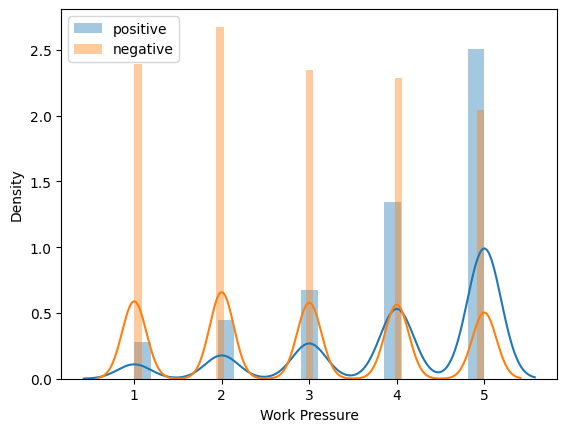

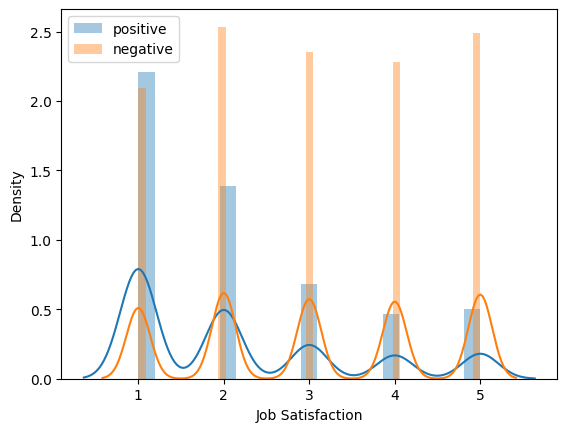

In [ ]:
for col in job_columns:
    plt.figure()
    sns.distplot(positive_df[col],label='positive')
    sns.distplot(negative_df[col],label='negative')
    plt.legend()

### **Relation Target / age**

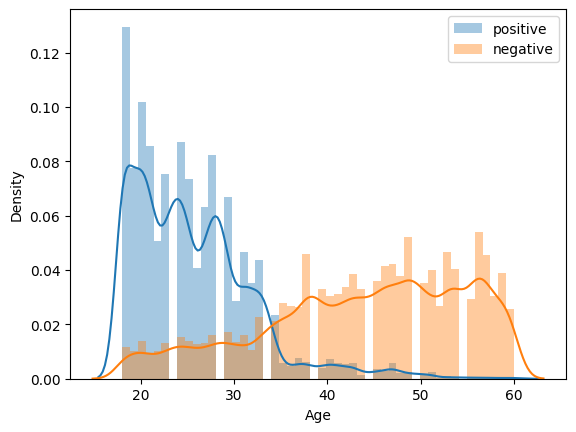

In [ ]:
plt.figure()
sns.distplot(positive_df['Age'],label='positive')
sns.distplot(negative_df['Age'],label='negative')
plt.legend()

### **Création des ensembles object et float**

In [ ]:
float_columns = df.select_dtypes(include=['float']).columns
object_columns = df.select_dtypes(include=['object']).columns

### **Relation Float variables : target**

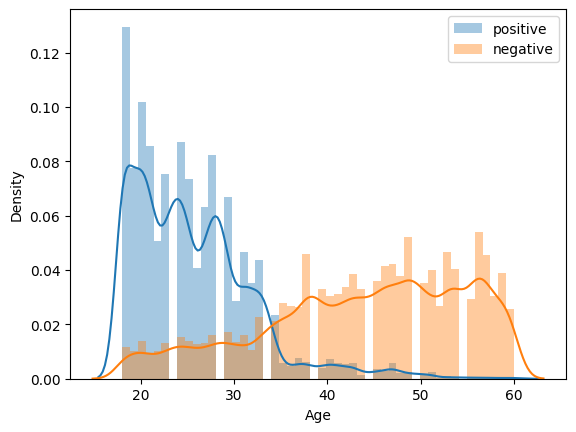

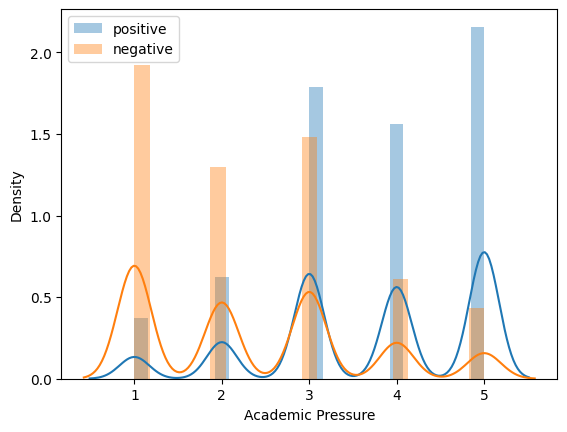

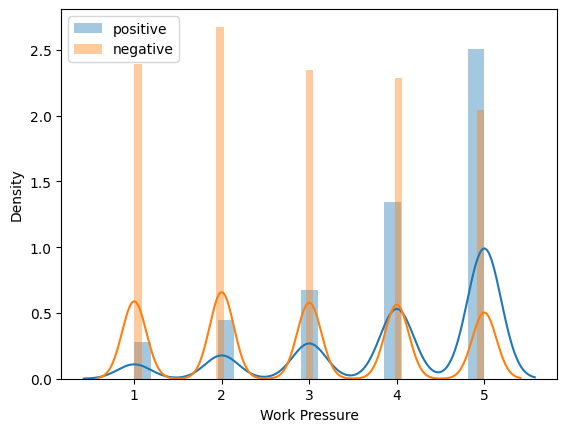

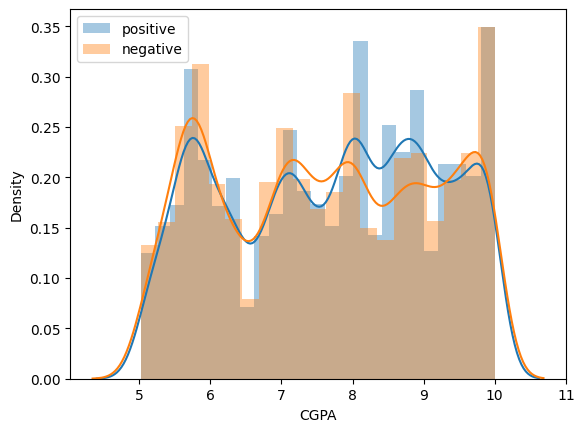

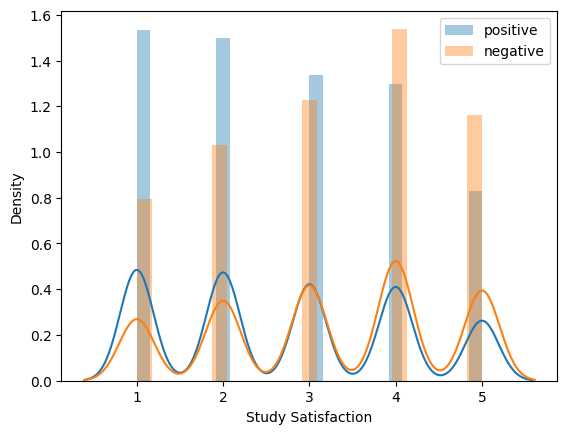

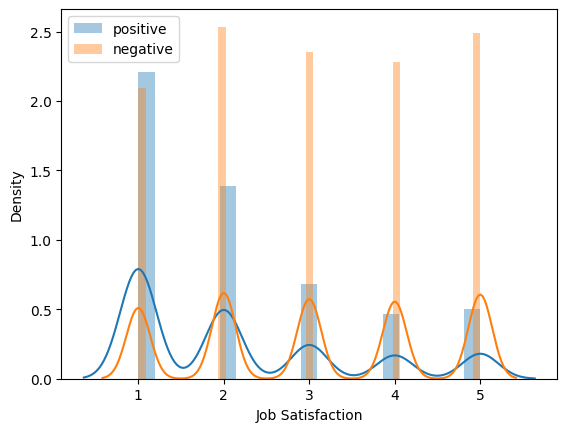

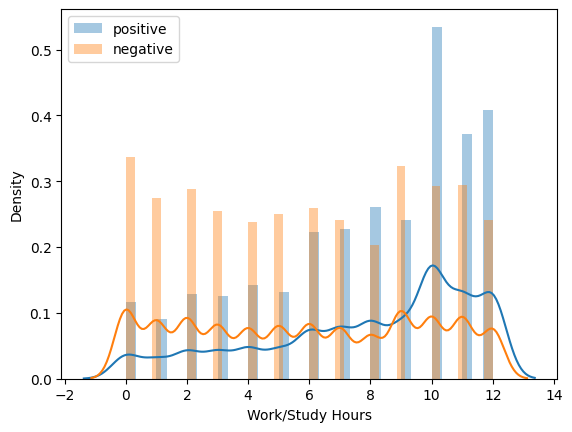

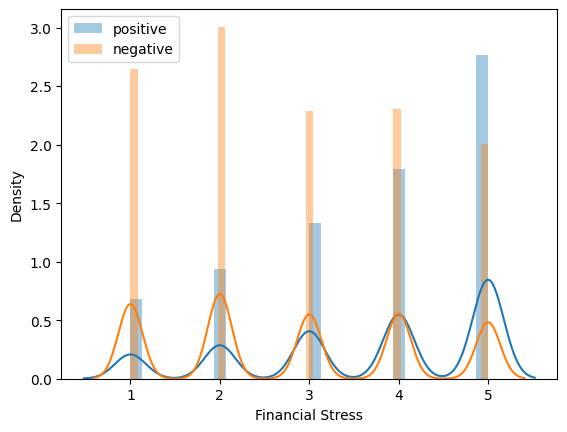

In [ ]:
for col in float_columns:
    plt.figure()
    sns.distplot(positive_df[col],label='positive')
    sns.distplot(negative_df[col],label='negative')
    plt.legend()

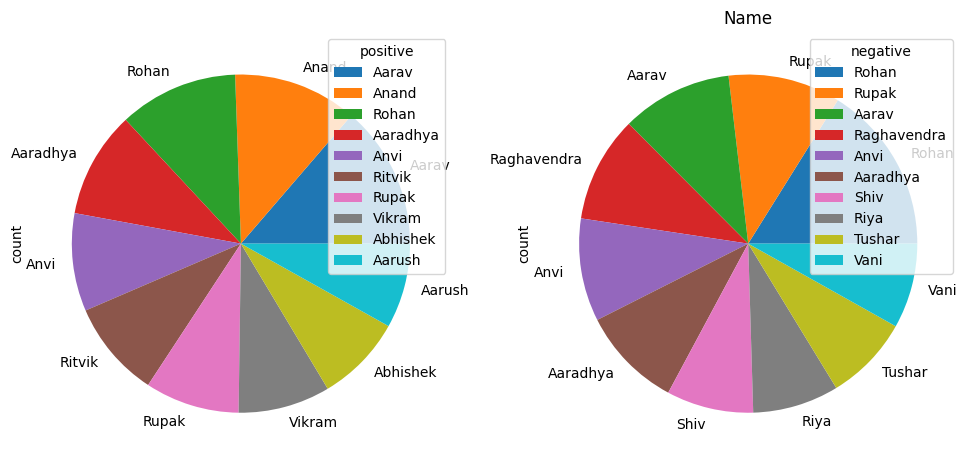

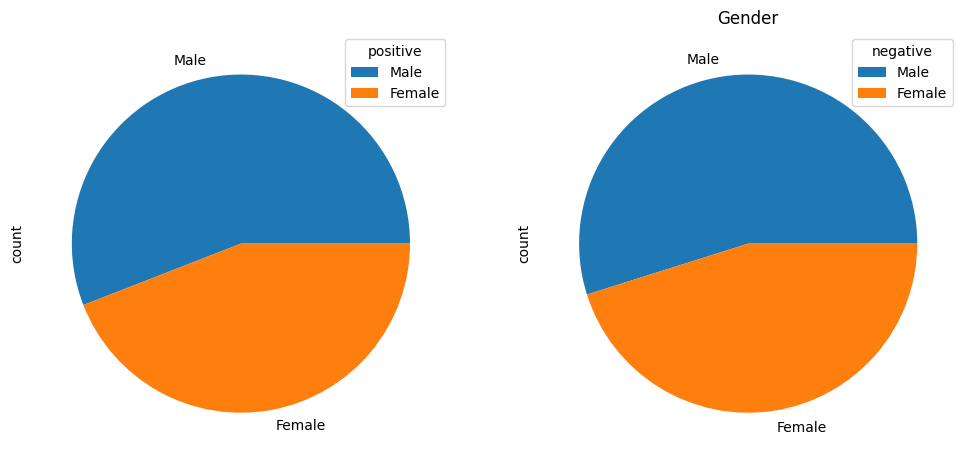

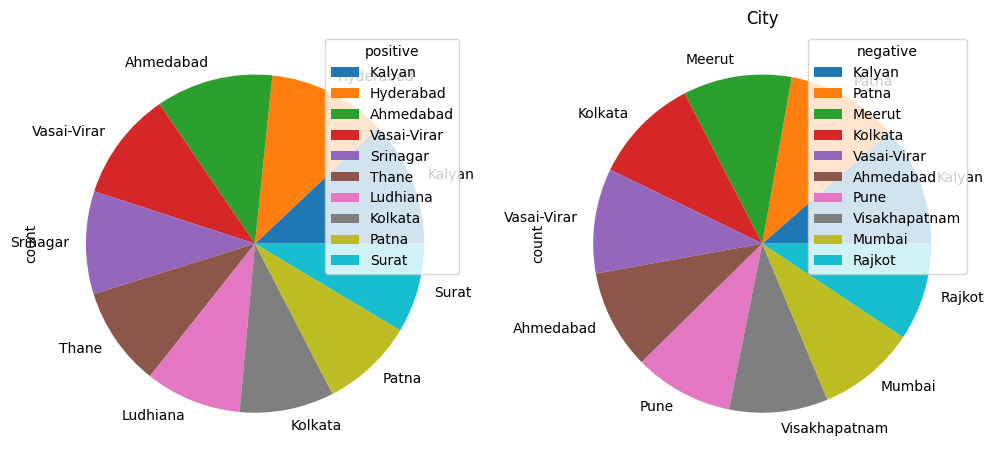

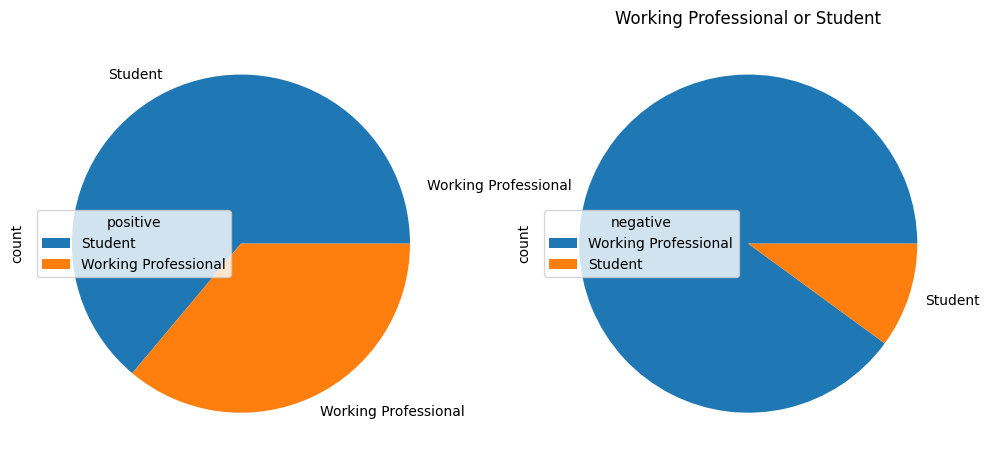

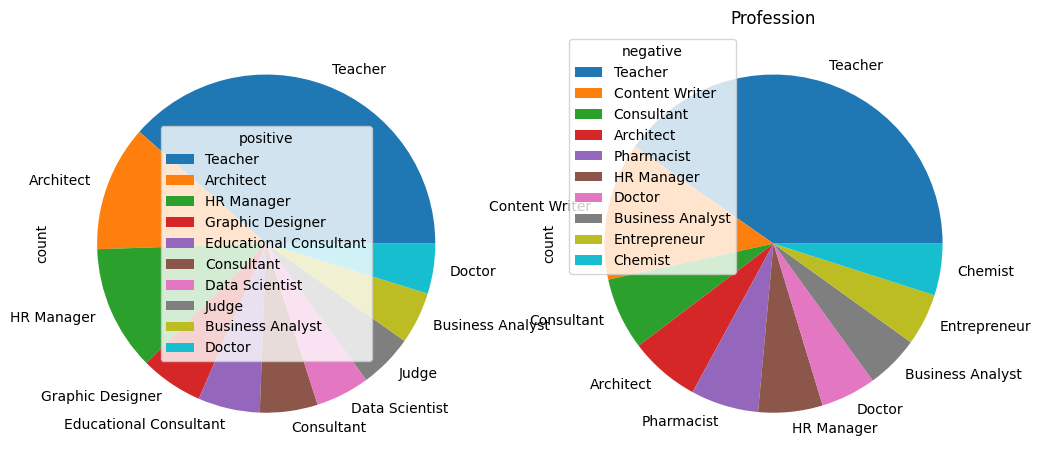

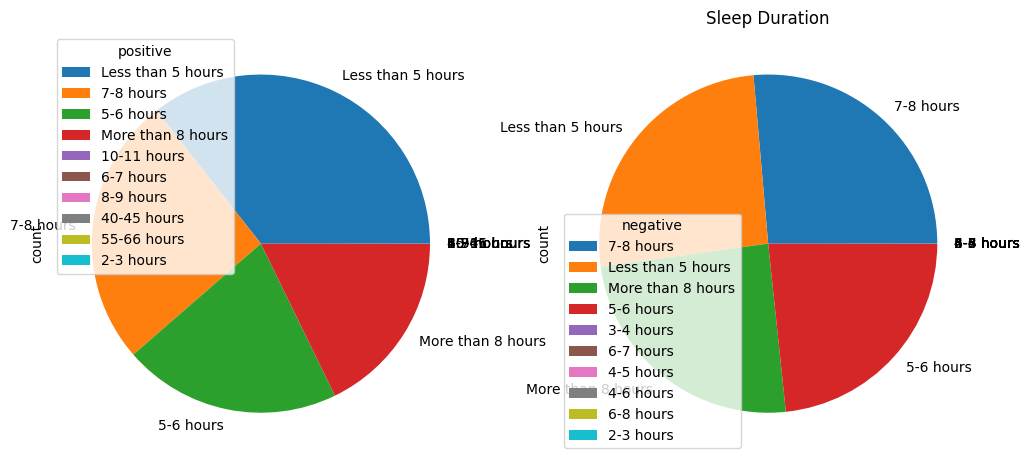

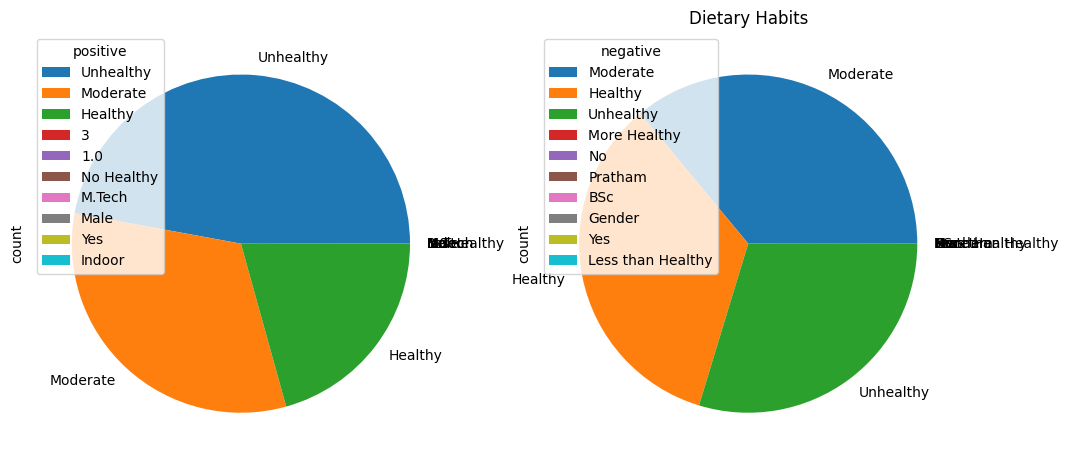

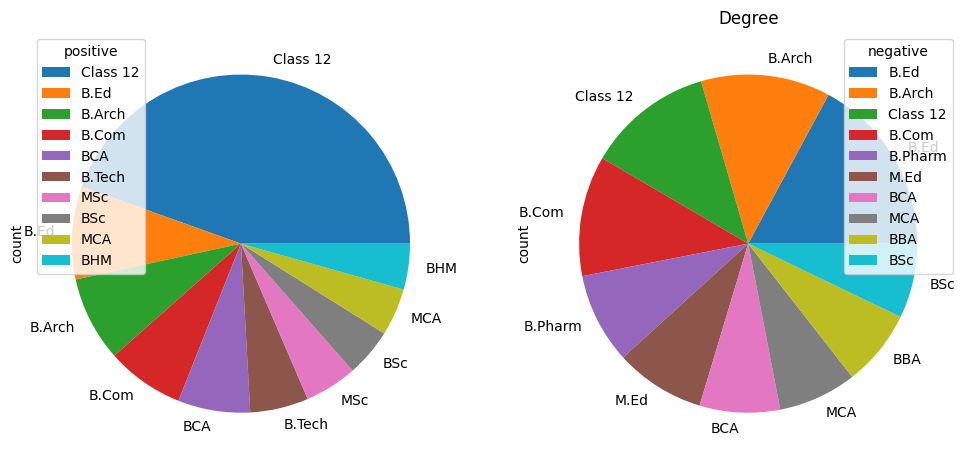

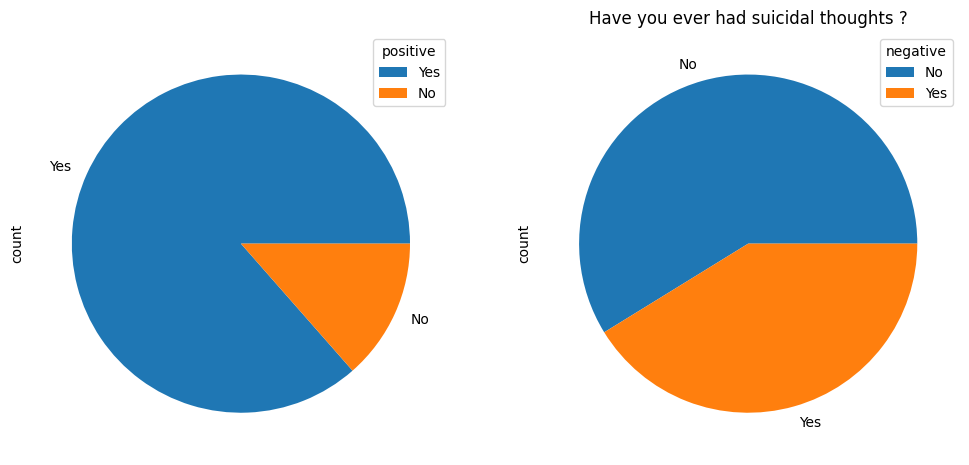

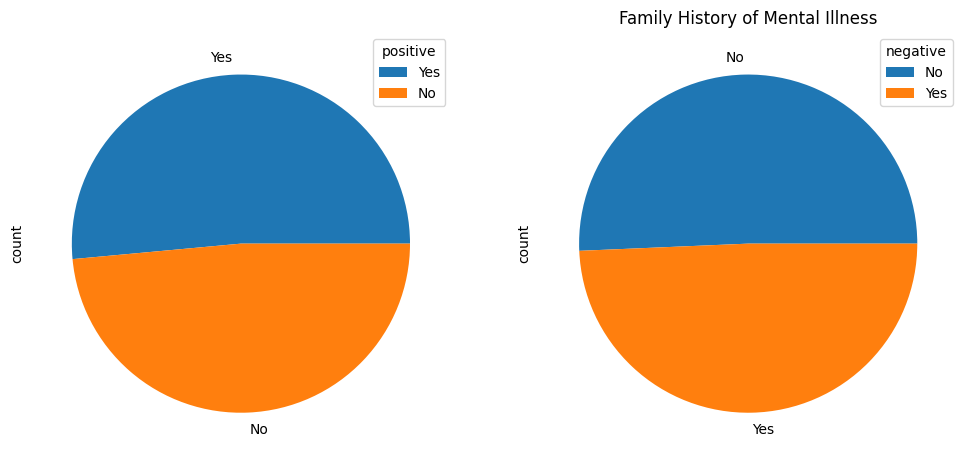

In [ ]:
for col in object_columns:
    plt.figure(figsize=(12,8))
    plt.subplot(1,2,1)
    positive_df[col].value_counts().sort_values(ascending=False)[:10].plot.pie()
    plt.legend(title='positive')
    plt.subplot(1,2,2)
    negative_df[col].value_counts().sort_values(ascending=False)[:10].plot.pie()
    plt.legend(title='negative')
    plt.title(col)
    plt.show()

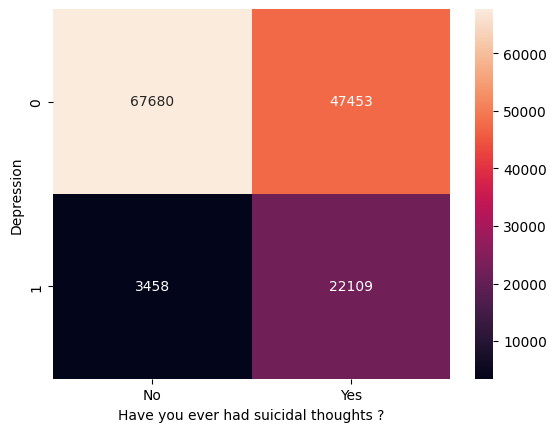

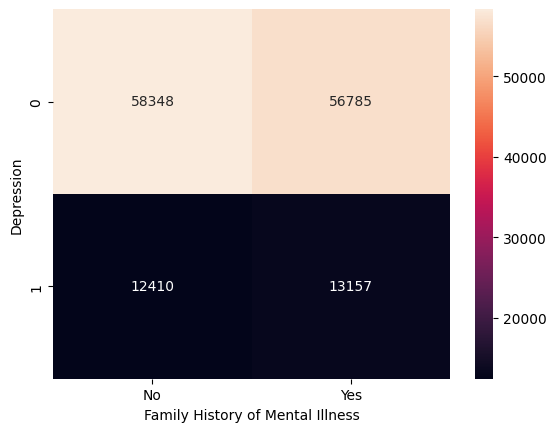

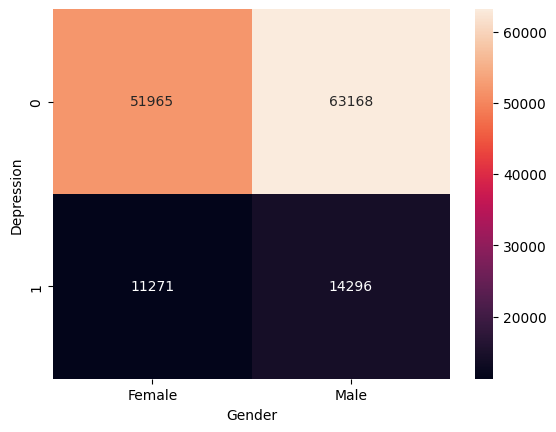

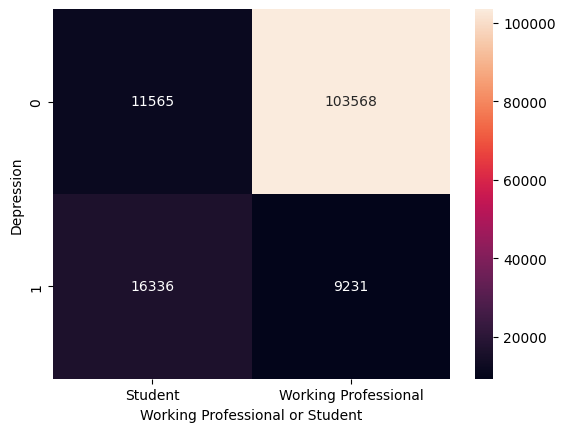

In [ ]:
for col in ['Have you ever had suicidal thoughts ?','Family History of Mental Illness','Gender','Working Professional or Student']:
    plt.figure()
    sns.heatmap(pd.crosstab(df[target_feature],df[col]),annot=True,fmt='d')

 # 2. bis Analyse plus détaillée
 * **Relation Variables / Variables :**
    * Float/Float : très faible corrélation
    * Age / Float : très faible corrélation
    * Sommeil / Float : très faible corrélation
    * 'Working Professional or Student / Float : 20-35 ans : Student, 35-60 ans : Working

* **NaN Analyse** :

* **Hypothèses nulles (H0) :**
    * Les durées de sommeil et régimes alimentaires sont significativement différents chez les déprimés et les non déprimés
      * H0= la durée de sommeil et le régime alimentaire sont EGAUX chez les individus déprimés et non déprimés
      * Hypothèse rejetée pour (il faudrait convertir nos données en float)

## **Relation Variable / Variable**
### **Relations Float/Float**

<Axes: >

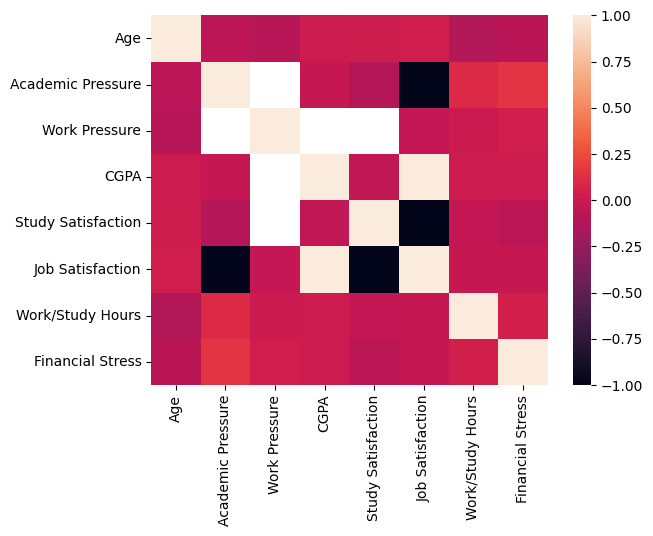

In [ ]:
sns.heatmap(df[float_columns].corr())

### **Float data / age**

<Figure size 640x480 with 0 Axes>

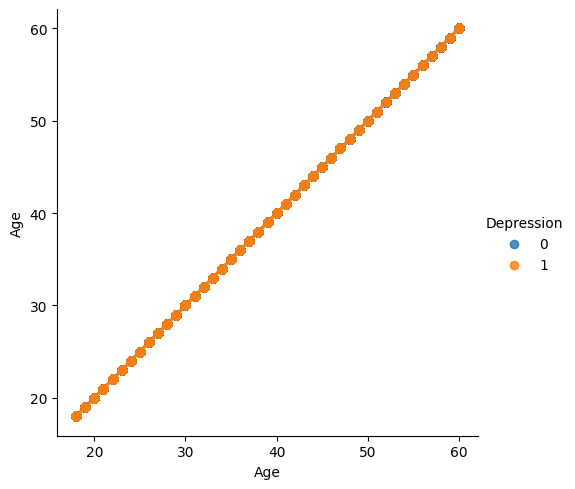

<Figure size 640x480 with 0 Axes>

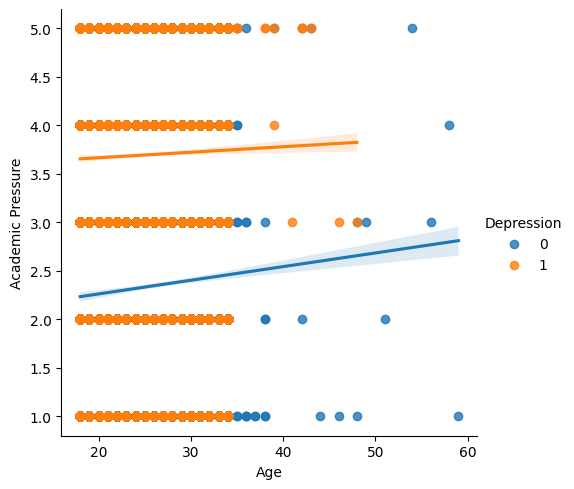

<Figure size 640x480 with 0 Axes>

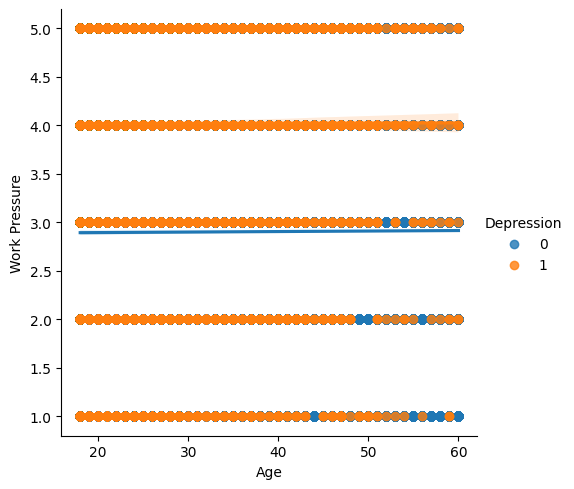

<Figure size 640x480 with 0 Axes>

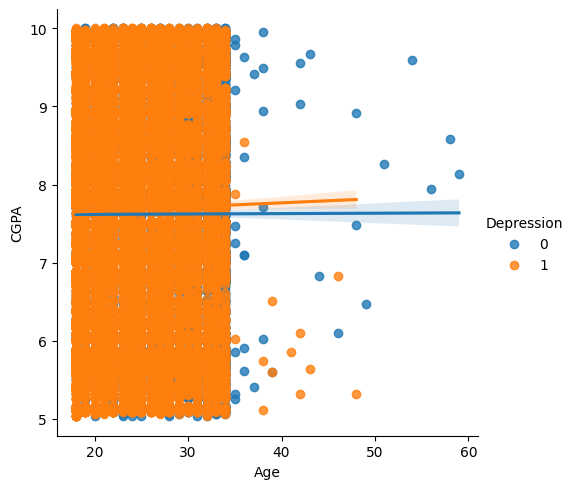

<Figure size 640x480 with 0 Axes>

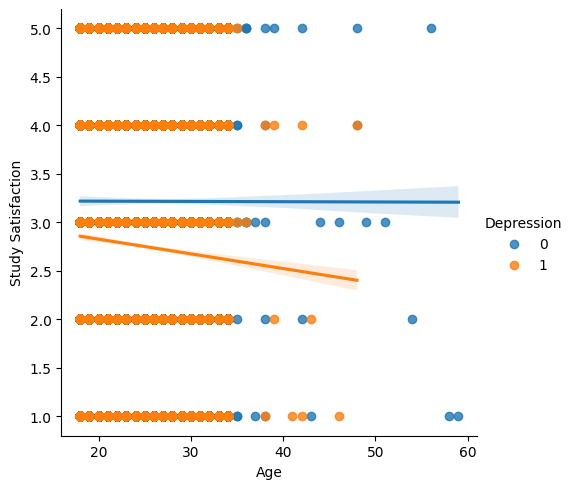

<Figure size 640x480 with 0 Axes>

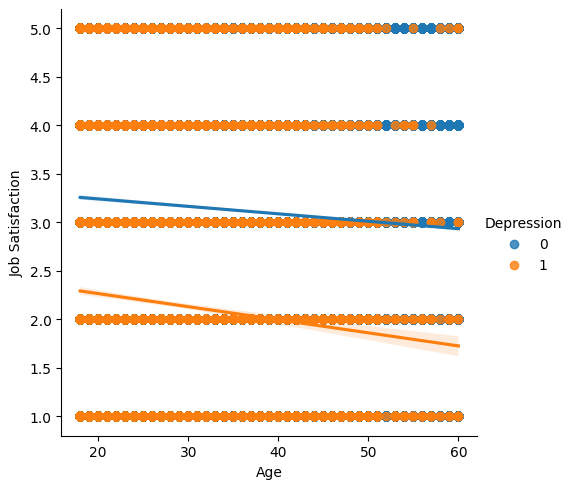

<Figure size 640x480 with 0 Axes>

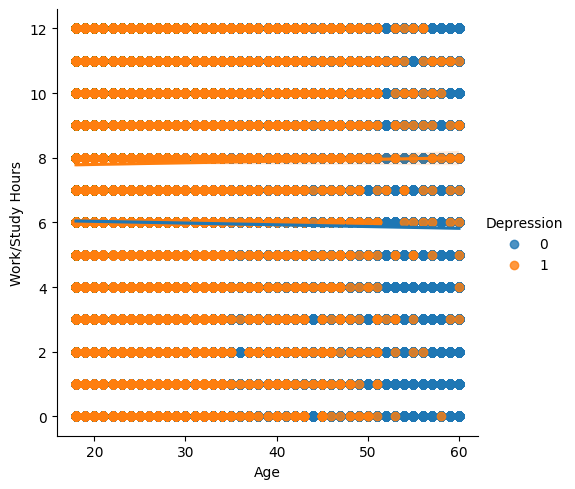

<Figure size 640x480 with 0 Axes>

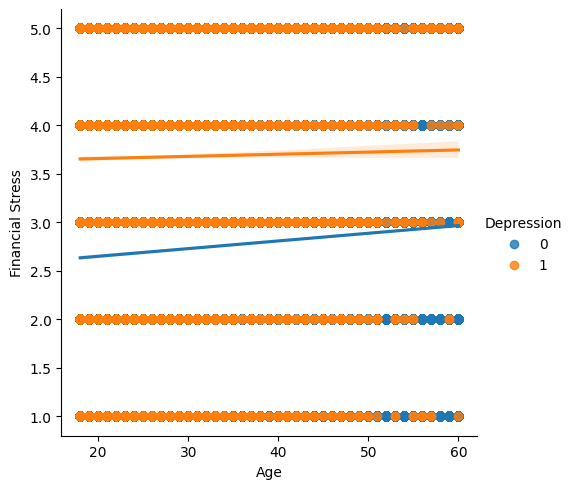

In [ ]:
for col in float_columns:
    plt.figure()
    sns.lmplot(x='Age',y=col,hue=target_feature,data=df)

In [ ]:
df.select_dtypes(include=['number']).corr()['Age'].sort_values()
#très faible corrélation entre l'âge et le reste

Depression           -0.564671
Work/Study Hours     -0.118356
Work Pressure        -0.098924
Financial Stress     -0.083589
Academic Pressure    -0.075956
CGPA                  0.005129
Study Satisfaction    0.008862
Job Satisfaction      0.030793
Age                   1.000000
Name: Age, dtype: float64

### **Sommeil/Float data**

In [ ]:
def sommeil(df):
    if df['Sleep Duration']in['Less than 5 hours','1-2 hours','2-3 hours'
 '3-4 hours','4-5 hours','1-3 hours','3-6 hours']:
        return '<5 heures'
    elif df['Sleep Duration']in['5-6 hours','4-6 hours']:
        return '5-6 heures'
    elif df['Sleep Duration']in['7-8 hours','6-8 hours','6-7 hours','Moderate','9-6 hours','8 hours']:
        return '6-8 heures'
    elif df['Sleep Duration']in['More than 8 hours','10-11 hours', '8-9 hours' , '9-11 hours']:
        return '>8 heures'
    else:
        return 'inconnu'

In [ ]:
df['sommeil']=df.apply(sommeil,axis=1)

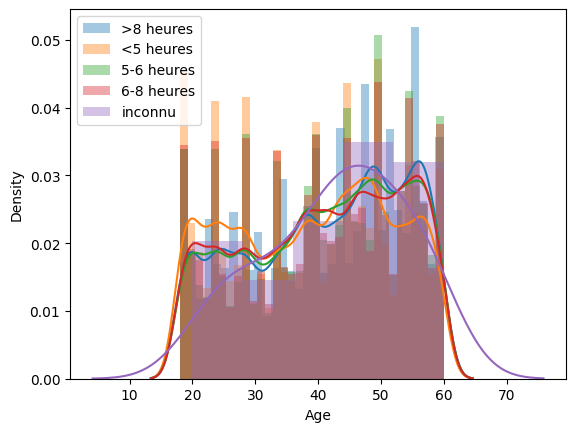

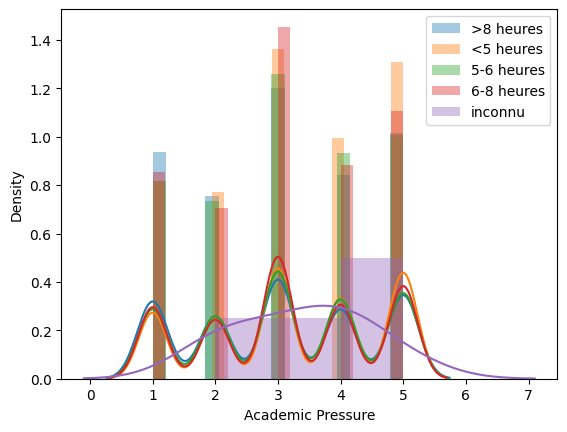

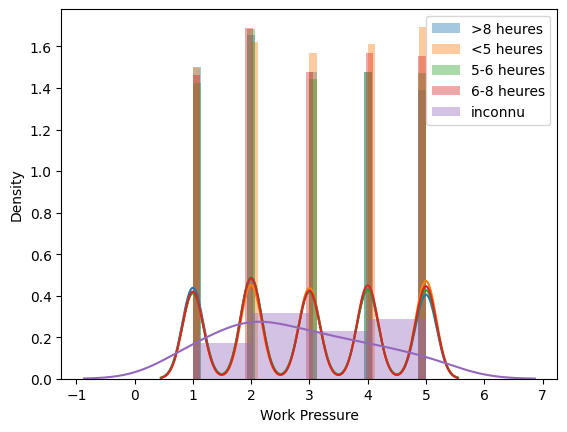

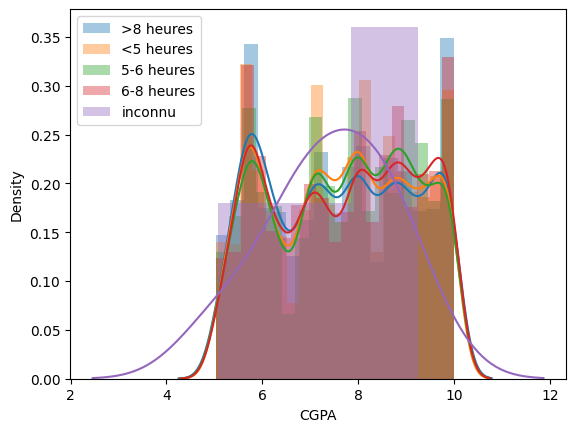

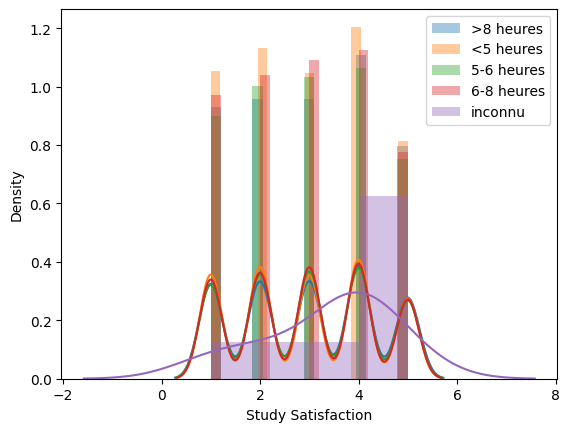

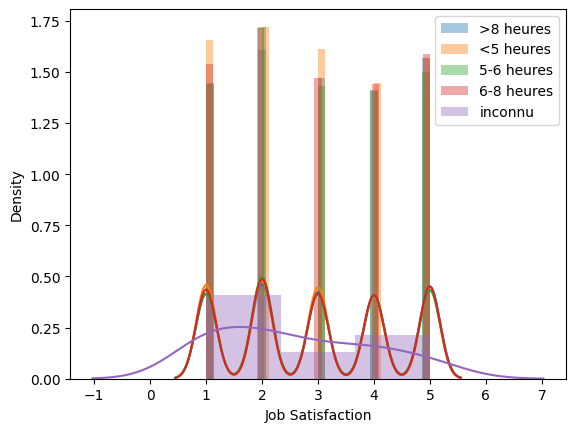

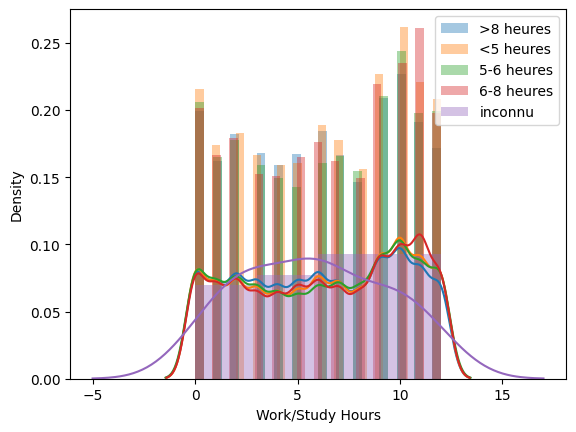

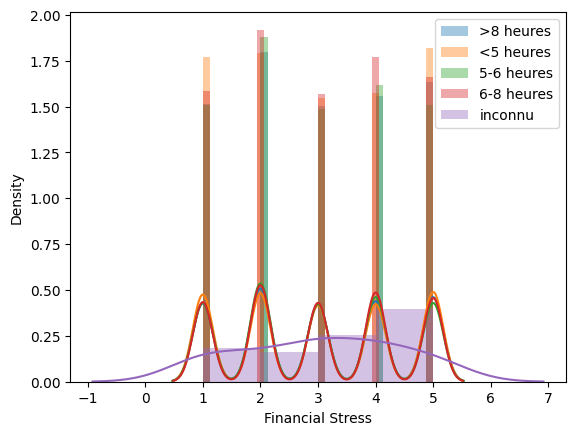

In [ ]:
for col in float_columns:
    plt.figure()
    for cat in df['sommeil'].unique():
        sns.distplot(df[df['sommeil']==cat][col],label=cat)
    plt.legend()

### **Working Professional or Student / Float**

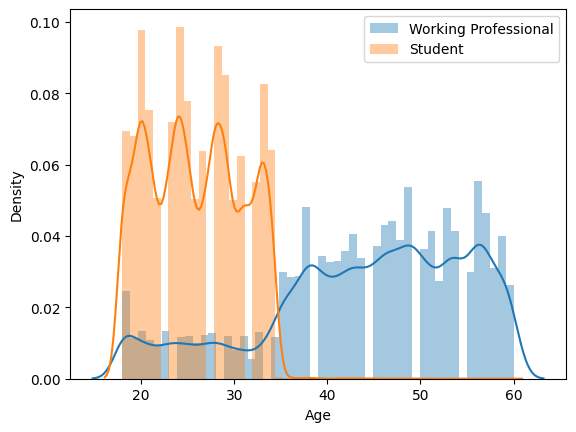

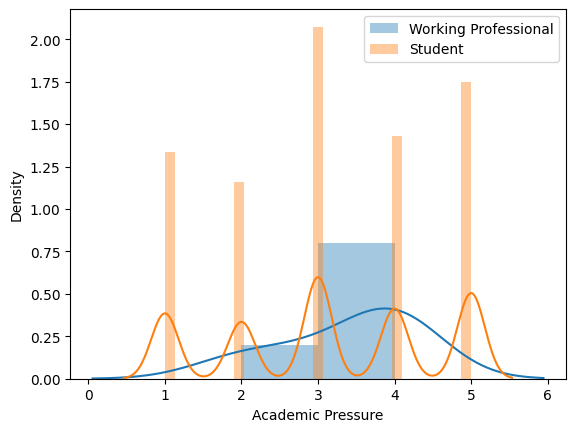

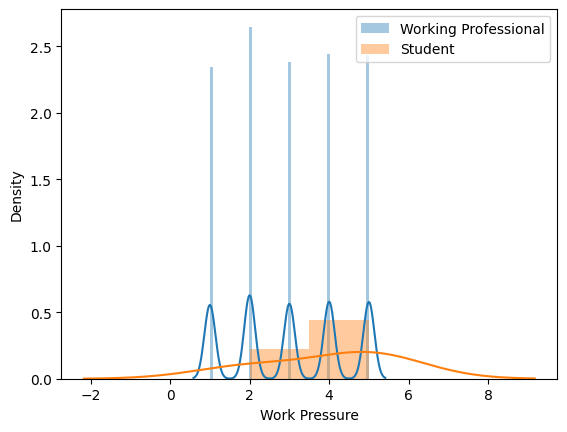

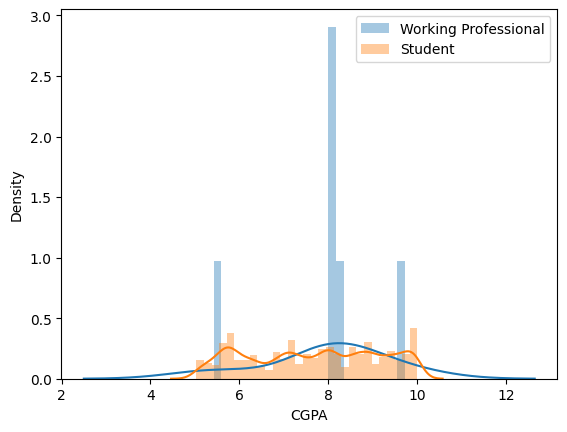

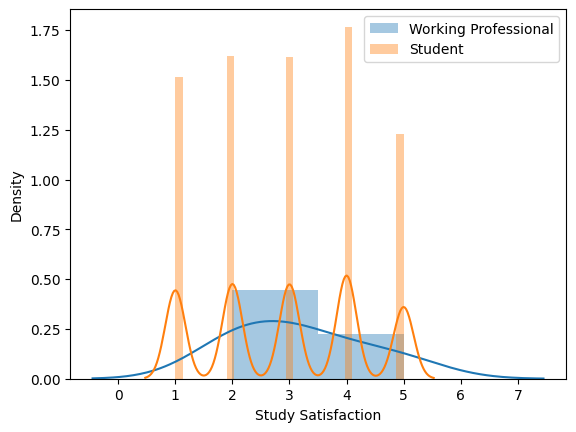

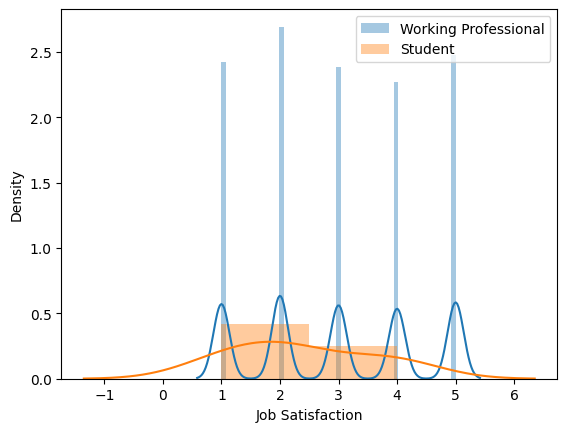

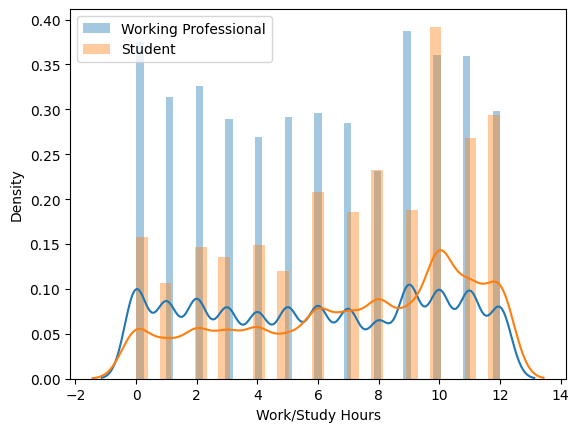

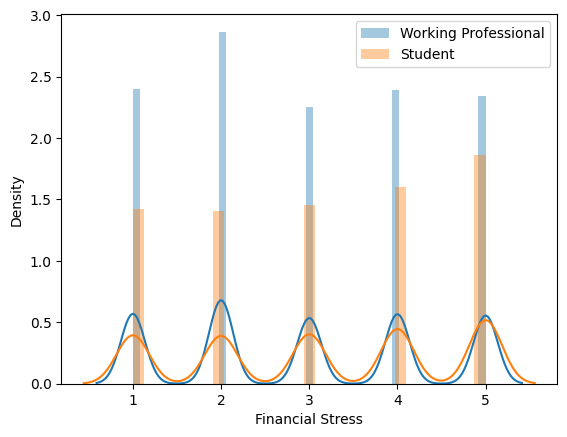

In [ ]:
for col in float_columns:
    plt.figure()
    for cat in df['Working Professional or Student'].unique():
        sns.distplot(df[df['Working Professional or Student']==cat][col],label=cat)
    plt.legend()

## **NaN Analyse**

In [ ]:
print('Combien de lignes restent si on enlevait toutes celles avec un NaN : \n')
df.dropna().count()

Combien de lignes restent si on enlevait toutes celles avec un NaN : 



Name                                     0
Gender                                   0
Age                                      0
City                                     0
Working Professional or Student          0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
sommeil                                  0
dtype: int64

In [ ]:
df1=df[job_columns]
df1['Depression']=df[target_feature]

print('Si on ne prend que les job_columns, les proportions de Depression sont :\n')
df1.dropna()['Depression'].value_counts(normalize=True)

Si on ne prend que les job_columns, les proportions de Depression sont :



Depression
0    0.918246
1    0.081754
Name: proportion, dtype: float64

In [ ]:
df2=df[studies_columns]
df2['Depression']=df[target_feature]

print('Si on ne prend que les studies_columns, les proportions de Depression sont :\n')
df2.dropna()['Depression'].value_counts(normalize=True)

Si on ne prend que les studies_columns, les proportions de Depression sont :



Depression
1    0.58558
0    0.41442
Name: proportion, dtype: float64

## **Hypothèses nulles**

**Test de Student**

**H0= la durée de sommeil est EGALE chez les individus déprimés et non déprimés**

In [ ]:
def diet_float(df):
    if df['Dietary Habits']in['Healthy', 'Moderate', 'More Healthy']:
        return 1
    elif df['Dietary Habits']in ['Unhealthy', 'Less than Healthy', 'No Healthy', 'Less Healthy']:
        return 2
    else:
        return 'Unknown'

In [ ]:
df['diet_float']=df.apply(diet_float,axis=1)

In [ ]:
def sommeil_float(df):
    if df['sommeil']=='<5 heures':
        return 1
    elif df['sommeil']=='5-6 heures':
        return 2
    elif df['sommeil']=='6-8 heures':
        return 3
    elif df['sommeil']=='>8 heures':
        return 4
    else:
        return 'Unknown'

In [ ]:
df['sommeil_float']=df.apply(sommeil_float,axis=1)